**EDA for Diabetes Data**

*Data Analyst*
- 1. Are there any null values or duplicated values? How will you wrangle/handle them?
- 2. Are there any variables that warrant transformations?
- 3. Do you notice any patterns or anomalies in the data? Can you plot them?

*Data Statistic*
- 1. Distribution of mileage
- 2. Distribution of engine
- 3. Distribution of max_power
- 4. Distribution of torque
- 5. Bar Chart by Fuel
- 6. Bar Chart by Seller_type
- 7. Bar Chart by Transmission
- 8. Bar Chart by owner
- 9. Show Data oldest car
- 10. Total Selling Price
- 11. Car with max selling price
- 12. Machine Learning Regression

Soal Machine Learning:
- Jika saya mempunyai mobil Hyundai tahun 2016 dengan total km 12000 dilengkapi dengan bahan bakar Petrol, penjualan secara individu, transmisi manual, tangan pertama, jarak tempuh 23 Miles, engine 1497 CC, 78 Horse Power, 250 Torsi , serta 5 kursi. Berapakah harga yang diberikan ?

*Data Visualization*

Will be showing in Power BI

In [116]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

# Read Data

In [40]:
df = pd.read_csv('CarDetail.csv')

In [41]:
df

,name.1,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque.1,seats,selling_price
0,Maruti,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5,450000
1,Skoda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5,370000
2,Honda,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7,5,158000
3,Hyundai,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4,5,225000
4,Maruti,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5,5,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7,5,320000
7902,Hyundai,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,24.0,5,135000
7903,Maruti,2009,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190.0,5,382000
7904,Tata,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140.0,5,290000


- Mileage = Jarak Tempuh dalam mil (Mil.)
- Engine = Besar CC mobil (CC)
- Max_power = Horse Power (HP)
- Torque = Satuan Torsi Mobil (Newton Meter)

# Check Outlier, Null Values, dan Duplicated Values

In [42]:
df.isnull().sum()

name.1            0
year              0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque.1         10
seats             0
selling_price     0
dtype: int64

Ada 10 Data torque yang kosong, sehingga akan ditampilkan data tersebut

In [43]:
null_data = pd.isnull(df['torque.1'])
df[null_data]

,name.1,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque.1,seats,selling_price
751,Ford,2013,110000,Diesel,Individual,Automatic,Third Owner,12.8,2953,156.00,NaN,7,1075000
1941,Honda,2011,80000,Petrol,Individual,Manual,Second Owner,16.0,1198,90.00,NaN,5,350000
2163,Hyundai,2018,5000,Petrol,Individual,Automatic,First Owner,14.8,1591,121.30,NaN,5,1350000
2804,Hyundai,2019,20000,Diesel,Individual,Manual,First Owner,24.0,1396,88.76,NaN,5,960000
3149,Hyundai,2015,40000,Diesel,Dealer,Automatic,First Owner,17.6,1582,126.20,NaN,5,910000
4073,Isuzu,2019,10000,Diesel,Individual,Automatic,First Owner,13.8,2999,174.57,NaN,7,2700000
4268,Isuzu,2019,10000,Diesel,Individual,Automatic,First Owner,13.8,2999,174.57,NaN,7,2700000
6110,Hyundai,2017,41000,Diesel,Dealer,Manual,First Owner,20.5,1582,126.20,NaN,5,975000
6992,Hyundai,2018,55000,Petrol,Individual,Automatic,First Owner,14.8,1591,121.30,NaN,5,1380000
7843,Hyundai,2016,40000,Petrol,Dealer,Automatic,First Owner,14.8,1591,121.30,NaN,5,890000


**Replace data** torque dengan **nilai rata-rata dari tiap kendaraan**, contoh torque yang kosong pada Hyundai akan direplace dengan rata-rata torque Hyundai

**Rata-rata torsi Hyundai**

In [44]:
tor_hyundai = df.loc[(df['name.1']=='Hyundai')]
tor_hyundai['torque.1'].mean()

136.84311669128493

**Replace Nan Values torsi Hyundai**

In [46]:
df.loc[2163,'torque.1'] = 136.84
df.loc[2804,'torque.1'] = 136.84
df.loc[3149,'torque.1'] = 136.84
df.loc[6110,'torque.1'] = 136.84
df.loc[6992,'torque.1'] = 136.84
df.loc[7843,'torque.1'] = 136.84

**Rata-rata torsi Isuzu**

In [47]:
tor_isuzu = df.loc[(df['name.1']=='Isuzu')]
tor_isuzu['torque.1'].mean()

334.3333333333333

**Replace torsi Isuzu**

In [49]:
df.loc[4073,'torque.1'] = 334.33
df.loc[4268,'torque.1'] = 334.33

**Rata-rata torsi Honda**

In [50]:
tor_honda = df.loc[(df['name.1']=='Honda')]
tor_honda['torque.1'].mean()

142.26387096774187

**Replace Torsi Honda**

In [51]:
df.loc[1941,'torque.1'] = 142.26

**Rata-rata torsi Ford**

In [52]:
tor_Ford = df.loc[(df['name.1']=='Ford')]
tor_Ford['torque.1'].mean()

168.09069767441872

**Replace Torsi Ford**

In [54]:
df.loc[751,'torque.1'] = 168.09

In [55]:
df.isnull().sum()

name.1           0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque.1         0
seats            0
selling_price    0
dtype: int64

In [56]:
df.dtypes

name.1            object
year               int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
torque.1         float64
seats              int64
selling_price      int64
dtype: object

# Transform name column

In [61]:
df = df.rename(columns={'name.1': 'NameCar', 'torque.1': 'Torque'})

In [62]:
df

,NameCar,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Torque,seats,selling_price
0,Maruti,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5,450000
1,Skoda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5,370000
2,Honda,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7,5,158000
3,Hyundai,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4,5,225000
4,Maruti,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5,5,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7,5,320000
7902,Hyundai,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,24.0,5,135000
7903,Maruti,2009,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190.0,5,382000
7904,Tata,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140.0,5,290000


# Distribution

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

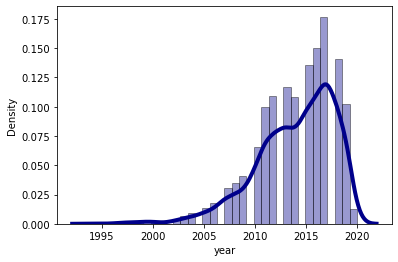

In [63]:
sns.distplot(df['year'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Rata-rata keluaran tahun mobil yang banyak dijual adalah **2010 sampai 2018**

<AxesSubplot:xlabel='mileage', ylabel='Density'>

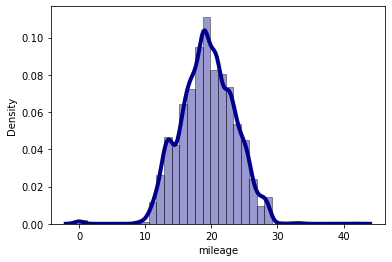

In [66]:
sns.distplot(df['mileage'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Rata-rata jarak tempuh mobil yang dijual adalah **20 Miles** yaitu sama dengan **32 km**

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='engine', ylabel='Density'>

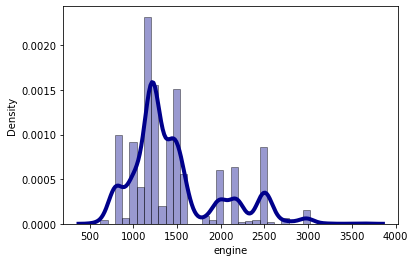

In [67]:
sns.distplot(df['engine'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Suatu mobil dikatakan mobil mewah apabila engine-nya diatas **1500 cc**. Pada distribusi engine diatas, mobil yang dijual bukan merupakan mobil mewah karena kebanyakan yang dijual **<1500 cc**

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_power', ylabel='Density'>

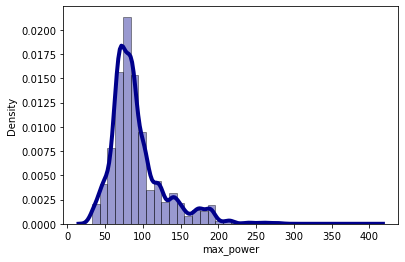

In [68]:
sns.distplot(df['max_power'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Rata-rata Horse Power yang dijual pada toko tersebut dibawah **100 HP**. Hal tersebut menunjukkan bahwa mobil yang dijual bukan termasuk mobil menengah ataupun supercar

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Torque', ylabel='Density'>

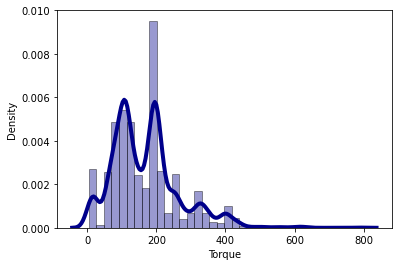

In [69]:
sns.distplot(df['Torque'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Rata rata torsi mobil yang dijual adalah **100 - 200 Nm**, hal tersebut menunjukkan rata rata mobil mempunyai torsi sebesar itu

# Matrix Correlation Between Selling Price and Others

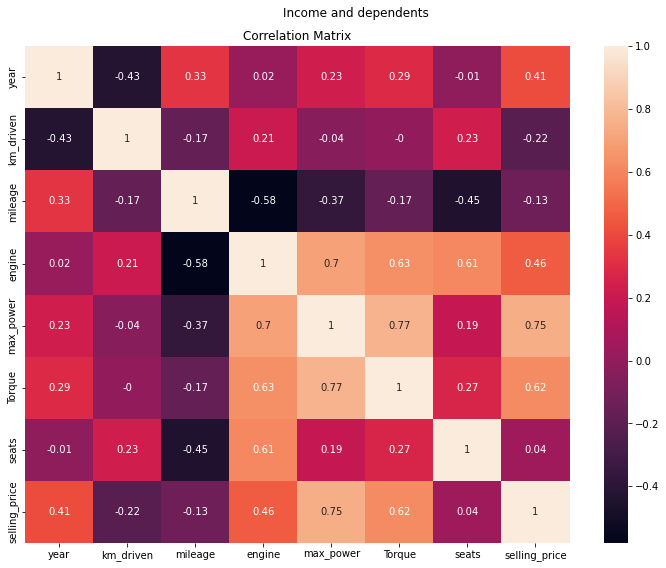

In [73]:
df_correlation_matrix = pd.DataFrame(df)

plt.figure(figsize=(10,8))
sns.heatmap(df_correlation_matrix.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('Income and dependents')
plt.tight_layout()

Pada matrix korelasi diatas, ditunjukkan bahwa penjualan mobil mempunyai korelasi yang sangat baik pada **max_power dan Torque**, artinya harga dari mobil tersebut akan **meningkat** apabila **max power dan torque juga ditingkatkan**.

**Keluaran tahun mobil serta engine** yang digunakan juga mempengaruhi sedikit harga mobil.

# Bar Chart

- **Fuel Bar Chart**

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NameCar        7906 non-null   object 
 1   year           7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   int64  
 9   max_power      7906 non-null   float64
 10  Torque         7906 non-null   float64
 11  seats          7906 non-null   int64  
 12  selling_price  7906 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 803.1+ KB


In [102]:
df_fuel = df.groupby('fuel')['selling_price'].count().reset_index()
df_fuel = df_fuel.rename(columns={'selling_price': 'Total Sales'})

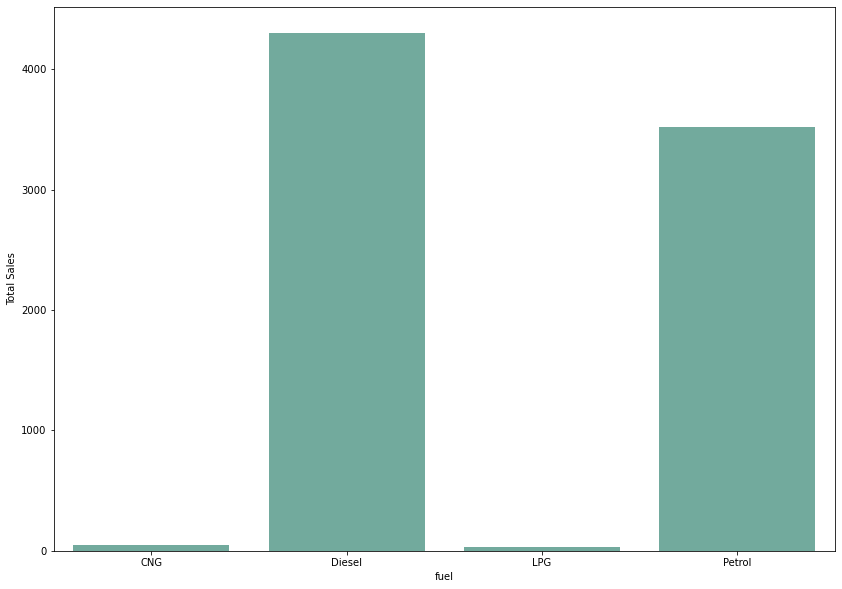

In [103]:
plt.figure(figsize=(14, 10))
# Make a barplot
sns.barplot(
    x="fuel", 
    y="Total Sales", 
    data=df_fuel, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

In [104]:
df_fuel

,fuel,Total Sales
0,CNG,52
1,Diesel,4299
2,LPG,35
3,Petrol,3520


Mobil yang paling laku terjual adalah mobil dengan bahan bakar **Diesel** yaitu sebesar 4299. Hal ini dikarenakan Diesel mempunyai **tenaga yang kuat** karena **tekanan pembakaran** pada mesin diesel **lebih tinggi** dari **mesin bensin**.

In [94]:
df_sel_type= df.groupby('seller_type')['selling_price'].count().reset_index()
df_sel_type = df_sel_type.rename(columns={'selling_price': 'Total Sales'})

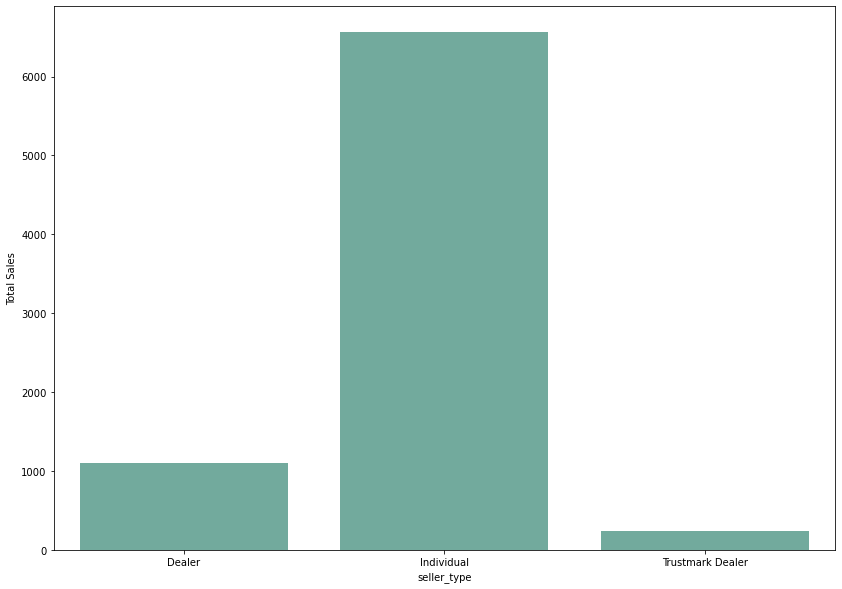

In [95]:
plt.figure(figsize=(14, 10))
# Make a barplot
sns.barplot(
    x="seller_type", 
    y="Total Sales", 
    data=df_sel_type, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

In [100]:
df_sel_type

,seller_type,Total Sales
0,Dealer,1107
1,Individual,6563
2,Trustmark Dealer,236


Penjualan secara **Individu lebih laku** dibanding Dealer dan Trustmark Dealer yaitu sebesar 6563, hal ini dikarenakan **kemungkinan ada diskon** apabila langsung membeli di perusahaan dibandingkan di Dealer.

In [96]:
df_trans= df.groupby('transmission')['selling_price'].count().reset_index()
df_trans = df_trans.rename(columns={'selling_price': 'Total Sales'})

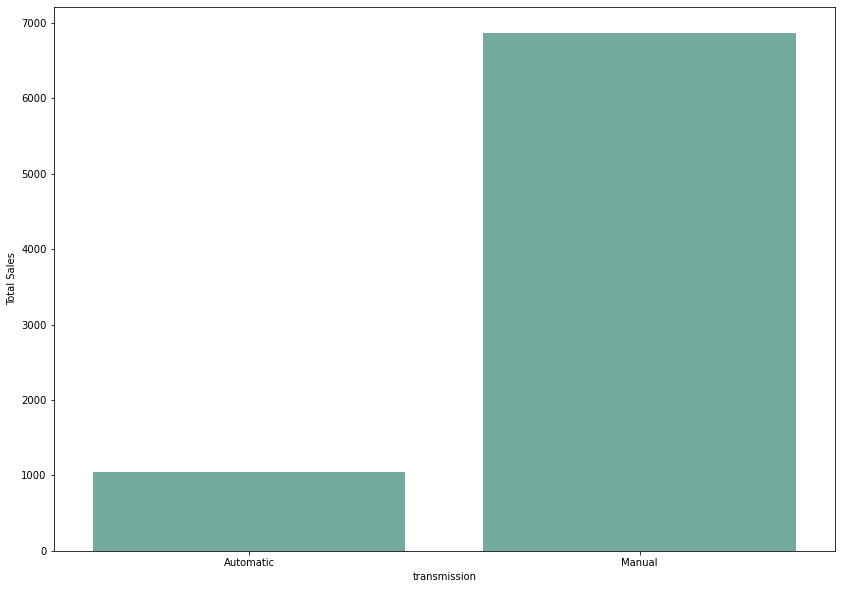

In [97]:
plt.figure(figsize=(14, 10))
# Make a barplot
sns.barplot(
    x="transmission", 
    y="Total Sales", 
    data=df_trans, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

In [105]:
df_trans

,transmission,Total Sales
0,Automatic,1041
1,Manual,6865


Mobil yang paling laku terjual berdasarkan transmisi adalah **Mobil Manual**. Mobil manual mempunyai keunggulan **kekuatan** pada bidang yang tidak rata, sehingga banyak diminati oleh beberapa orang, namun pada awalnya cukup **sulit untuk belajar** mobil manual dibandingkan automatic.

In [106]:
df_own= df.groupby('owner')['selling_price'].count().reset_index()
df_own = df_own.rename(columns={'selling_price': 'Total Sales'})

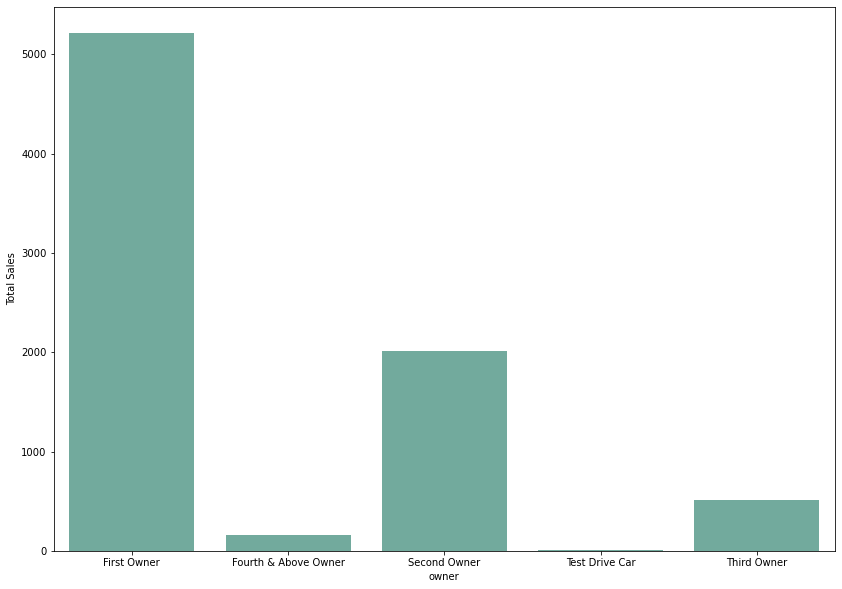

In [107]:
plt.figure(figsize=(14, 10))
# Make a barplot
sns.barplot(
    x="owner", 
    y="Total Sales", 
    data=df_own, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

In [108]:
df_own

,owner,Total Sales
0,First Owner,5215
1,Fourth & Above Owner,160
2,Second Owner,2016
3,Test Drive Car,5
4,Third Owner,510


Mobil yang paling laku berdasarkan owner adalah mobil dari **First Owner (Tangan Pertama)**. Istilah mobil bekas dari tangan pertama sendiri sering digunakan untuk menarik pasar. Kondisi ini lantaran mobil bekas dari tangan pertama dianggap memiliki kondisi yang lebih baik, apalagi semakin tua tahun produksi mobil bekas.

In [109]:
df['year'].min()

1994

In [110]:
df_first_owner = df.loc[(df['year']==1994)]
df_first_owner

,NameCar,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Torque,seats,selling_price
1428,Maruti,1994,60000,Petrol,Individual,Manual,First Owner,16.1,796,37.0,59.0,4,45000
4577,Ambassador,1994,100000,Diesel,Individual,Manual,Second Owner,12.8,1995,52.0,106.0,5,99000


Penjualan mobil paling tua yaitu **Maruti dan Ambassador** dengan harga **45000 USD** atau setara **700 juta rupiah** untuk Maruti dan **99000 USD** atau setara **1.5 Miliar rupiah** untuk Ambassador. Para pembeli berani membeli mobil tersebut karena **cukup langka** pada masa sekarang sehingga bisa dijadikan koleksi.

In [111]:
df['selling_price'].sum()

5137427277

Total harga penjualan dari toko mobil saat ini adalah **5,137,427,277 USD** atau setara **80 Triliun Rupiah**. Wow!!

In [115]:
df_max_price = df.loc[(df['selling_price']==df['selling_price'].max())]
df_max_price

,NameCar,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Torque,seats,selling_price
164,Volvo,2017,30000,Petrol,Individual,Automatic,First Owner,42.0,1969,400.0,640.0,4,10000000


Mobil paling mahal yang pernah dijual adalah **Volvo keluaran tahun 2017** dengan harga **10.000.000 USD** atau sekitar **156.800.500.000 Rupiah**. Kenapa bisa semahal itu? bisa jadi mobil tersebut bekas dari artis ternama sehingga harganya sangat amat mahal

# Prediksi Harga dengan Machine Learning

# Encoding String Column

In [118]:
df['NameCar'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [119]:
name = ['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel']

In [120]:
enc = OrdinalEncoder(categories=[name])

In [121]:
enc.fit_transform(df[['NameCar']])

array([[0.],
       [1.],
       [2.],
       ...,
       [0.],
       [8.],
       [8.]])

In [122]:
df[['NameCar']] = enc.fit_transform(df[['NameCar']])
df

,NameCar,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Torque,seats,selling_price
0,0.0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5,450000
1,1.0,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5,370000
2,2.0,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7,5,158000
3,3.0,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4,5,225000
4,0.0,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5,5,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,3.0,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7,5,320000
7902,3.0,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,24.0,5,135000
7903,0.0,2009,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190.0,5,382000
7904,8.0,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140.0,5,290000


In [123]:
df['NameCar'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30.])

In [124]:
df.dtypes

NameCar          float64
year               int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
Torque           float64
seats              int64
selling_price      int64
dtype: object

# Change data types to integer

In [125]:
df['NameCar'] = df['NameCar'].astype(int)

In [126]:
df.dtypes

NameCar            int32
year               int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
Torque           float64
seats              int64
selling_price      int64
dtype: object

In [127]:
df

,NameCar,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Torque,seats,selling_price
0,0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5,450000
1,1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5,370000
2,2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7,5,158000
3,3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4,5,225000
4,0,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5,5,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,3,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7,5,320000
7902,3,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,24.0,5,135000
7903,0,2009,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190.0,5,382000
7904,8,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140.0,5,290000


# Encoding Fuel Column

In [128]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [129]:
fuel = ['Diesel', 'Petrol', 'LPG', 'CNG']

In [130]:
enc = OrdinalEncoder(categories=[fuel])

In [131]:
df[['fuel']] = enc.fit_transform(df[['fuel']])

In [132]:
df['fuel'] = df['fuel'].astype(int)

In [133]:
df['fuel'].unique()

array([0, 1, 2, 3])

# Encoding seller_type Column

In [134]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [135]:
seller = ['Individual', 'Dealer', 'Trustmark Dealer']

In [136]:
enc = OrdinalEncoder(categories=[seller])

In [137]:
df[['seller_type']] = enc.fit_transform(df[['seller_type']])

In [138]:
df['seller_type'] = df['seller_type'].astype(int)

In [139]:
df['seller_type'].unique()

array([0, 1, 2])

# Encoding transmission

In [140]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [141]:
trans = ['Manual', 'Automatic']

In [142]:
enc = OrdinalEncoder(categories=[trans])

In [143]:
df[['transmission']] = enc.fit_transform(df[['transmission']])

In [144]:
df['transmission'] = df['transmission'].astype(int)

In [145]:
df['transmission'].unique()

array([0, 1])

# Encoding Owner

In [146]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [147]:
own = ['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car']

In [148]:
enc = OrdinalEncoder(categories=[own])

In [149]:
df[['owner']] = enc.fit_transform(df[['owner']])

In [150]:
df['owner'] = df['owner'].astype(int)

In [151]:
df['owner'].unique()

array([0, 1, 2, 3, 4])

# Split data

In [152]:
X = df.drop(['selling_price'],axis=1)
Y = df['selling_price']

In [153]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

# Build Model

In [154]:
from sklearn.linear_model import LinearRegression

# 1. Multiple Linear Regression

In [155]:
regressor = LinearRegression()

In [156]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [157]:
y_pred = regressor.predict(X_test)

In [158]:
regressor.score(X_test,Y_test)

0.6805148996199218

Model is OK

In [159]:
df

,NameCar,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Torque,seats,selling_price
0,0,2014,145500,0,0,0,0,23.40,1248,74.00,190.0,5,450000
1,1,2014,120000,0,0,0,1,21.14,1498,103.52,250.0,5,370000
2,2,2006,140000,1,0,0,2,17.70,1497,78.00,12.7,5,158000
3,3,2010,127000,0,0,0,0,23.00,1396,90.00,22.4,5,225000
4,0,2007,120000,1,0,0,0,16.10,1298,88.20,11.5,5,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,3,2013,110000,1,0,0,0,18.50,1197,82.85,113.7,5,320000
7902,3,2007,119000,0,0,0,3,16.80,1493,110.00,24.0,5,135000
7903,0,2009,120000,0,0,0,0,19.30,1248,73.90,190.0,5,382000
7904,8,2013,25000,0,0,0,0,23.57,1396,70.00,140.0,5,290000


In [160]:
regressor.predict([[3,2016,12000,1,0,0,1,23.4,1497,78,250,5]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([650955.23015245])

In [161]:
y_pred = y_pred.astype(int)

In [162]:
df_preds = pd.DataFrame({'Actual': Y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds

,Actual,Predicted
3927,430000,744486
4695,779000,1325518
4979,200000,134676
6325,800000,933763
44,390000,519218
...,...,...
7596,450000,1161567
2228,650000,821766
555,120000,-196935
4916,340000,309317


# 2. Decision Tree Regression

In [163]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,Y)

DecisionTreeRegressor(random_state=0)

In [164]:
y_pred = regressor.predict(X_test)

In [165]:
regressor.score(X_test,Y_test)

0.9993845138016143

Model Overfitting

In [166]:
regressor.predict([[3,2016,12000,1,0,0,1,23.4,1497,78,250,5]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([620000.])

In [167]:
df_preds = pd.DataFrame({'Actual': Y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds

,Actual,Predicted
3927,430000,430000.0
4695,779000,779000.0
4979,200000,190000.0
6325,800000,818750.0
44,390000,390000.0
...,...,...
7596,450000,450000.0
2228,650000,650000.0
555,120000,120000.0
4916,340000,340000.0


# 3. Random Forest Regression

In [168]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X,Y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [169]:
y_pred = regressor.predict(X_test)

In [170]:
regressor.score(X_test,Y_test)

0.9944966542907951

Model Overfitting

In [171]:
regressor.predict([[3,2016,12000,1,0,0,1,23.4,1497,78,250,5]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([544600.])

In [172]:
df_preds = pd.DataFrame({'Actual': Y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds

,Actual,Predicted
3927,430000,435000.000000
4695,779000,779000.000000
4979,200000,190833.333333
6325,800000,842614.285714
44,390000,411500.000000
...,...,...
7596,450000,455500.000000
2228,650000,602000.000000
555,120000,88670.200000
4916,340000,346200.000000


# Kesimpulan

Berdasarkan **EDA Car Selling** diatas, didapat beberapa kesimpulan sebagai berikut.
- 1. Terdapat beberapa mobil dengan **kolom torsi tidak diisi**, sehingga perlu dilakukan pemrosesan data agar machine learning yang dihasilkan lebih baik.
- 2. Mobil yang banyak dijual adalah mobil dengan keluaran **tahun 2010-2018**, jarak tempuh dibawah **32 km**, engine **dibawah 1500CC**, Horse power **kurang dari 100HP**, dan torsi antara **100-200Nm**. Akan tetapi ada dua mobil antik yang pernah terjual yaitu **mobil Maruti dan Ambassador** keluaran **tahun 1994**.
- 3. Berdasarkan transmisi, mobil yang sering terjual adalah **mobil manual** karena tenaganya lebih kuat dibanding automatic. Akan tetapi mobil yang paling mahal adalah **mobil Volvo keluaran tahun 2017** dengan transmisi **automatic** seharga **156 Miliar Rupiah**.
- 4. Berdasarkan bahan bakar, mobil paling banyak terjual adalah mobil dengan bahan bakar Diesel, hal ini dikarenakan Diesel mempunyai **tenaga yang kuat** karena **tekanan pembakaran** pada mesin diesel **lebih tinggi** dari **mesin bensin**.
- 5. Berdasarkan seller, mobil yang paling laku adalah mobil dari **Individual dibandingkan dari Dealer**, karena apabila dari Dealer akan ada **potongan tertentu sesuai ketentuan Dealer**, sehingga penjualan dari Individual lebih diminati.
- 6. Tipe owner yang paling laku adalah mobil dari **First Owner**, kondisi ini lantaran mobil bekas dari tangan pertama dianggap memiliki kondisi yang lebih baik, apalagi semakin tua tahun produksi mobil bekas.
- 7. Harga mobil semakin meningkat apabila **Horse Power dan Torsi** dari mobil semakin tinggi, hal itu karena mobil akan lebih bertenaga dibandingkan horse power ataupun torsi yang sedikit.
- 8. Total harga dari mobil yang terjual hingga saat ini adalah **80 Triliun Rupiah**.
- 9. Jawaban dari Machine Learning adalah **650,955.23 USD** atau setara **10.196.041.958 Rupiah**.